# Narek Boghosian Final Project Notebook

### Approach and Metric

Our group's approach was to find the best neighborhood using deaths. We used various types of naturally-caused deaths, such as COVID-19 deaths and median age of death, as our metric to measure the overall safety of each neighborhood purely based on natural events. My submetric was landslide deaths, which proves relevant due to Pittsburgh's hilly geography. My dataset comes from a recent version of NASA's Cooperative Open Online Landslide Repository, updated in February 2021.

### Coding Approach

For my dataset in particular, I found that I was given no outright way in the dataset itself to identify which neighborhood landslides were occuring in, though I was given longitude and latitude coordinates. With these coordinates supplied to me, I decided to use geopy and the Nominatim API to reverse identify the given coordinates.

In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
geolocator = Nominatim(user_agent="geoapiExercises")

After being able to get the API imported and ready, I had to import the dataset and find a way to narrow down my searches. Because this was not a western PA specific dataset, it included over 11,000 entries from all over the world. Trying to narrow down by city name proved to be useless, as some neighboring towns were included when using a query mask for "Pittsburgh", and some entries didn't even include a city name. My solution to this was to create a query mask using the latitude and longitude values, finding the very edges of Pittsburgh to create a "bounding box" of sorts around the city.

In [19]:
nbddict = {}
lssize = {}
ls_data = pd.read_csv("globallandslides.csv")
latlon_mask = ls_data.loc[(ls_data['latitude']>=40.361107) & (ls_data['latitude']<=40.492077) & (ls_data['longitude']>=-80.096468) & (ls_data['longitude']<=-79.865034)]

Of course, Pittsburgh itself isn't exactly in the shape of a square, but by creating this bounding box, the number of entries was lowered by a significant amount compared to the original 11,000. Here I also create two dictionaries that I will use later to store the data.

In [3]:
len(latlon_mask)

47

From here, we can then reverse geolocate every single remaining entry. The raw location gives us a full address, and transcribing it into a dictionary then lets every part of the address to be keyed, allowing us to then filter by city and print out the results including the neighborhood. All that's left from here is to fill the previously made two dictionaries, and to keep track of the appearances of each neighborhood, and the average size of the landslides in each neighborhood using numbered values.

In [20]:
for index, row in latlon_mask.iterrows():
    fatalities = row['fatalities']
    size = row['ls_size']
    lat = row['latitude']
    long = row['longitude']
    location = geolocator.reverse(str(lat)+","+str(long))
    address = location.raw['address']
    city = address.get('city', '')
    neighbourhood = address.get('neighbourhood', '')
    county = address.get('county', '')
    if(city == "Pittsburgh" and fatalities != 'NaN'):
        if neighbourhood.lower() in nbddict:
            nbddict[neighbourhood.lower()] += 1
        else:
            nbddict[neighbourhood.lower()] = 1
    if(city == "Pittsburgh" and fatalities != 'NaN' and size == 'small'):
        if neighbourhood.lower() in lssize:
            lssize[neighbourhood.lower()] += 1
        else:
            lssize[neighbourhood.lower()] = 1
    if(city == "Pittsburgh" and fatalities != 'NaN' and size == 'medium'):
        if neighbourhood.lower() in lssize:
            lssize[neighbourhood.lower()] += 2
        else:
            lssize[neighbourhood.lower()] = 2
    if(city == "Pittsburgh" and fatalities != 'NaN' and size == 'large'):
        if neighbourhood.lower() in lssize:
            lssize[neighbourhood.lower()] += 3
        else:
            lssize[neighbourhood.lower()] = 3
for key in lssize:
    lssize[key] = lssize[key] / nbddict[key]
print(nbddict)
print(lssize)

{'mount washington': 11, 'squirrel hill south': 3, 'greenfield': 3, 'lincoln-lemington-belmar': 2, 'elliott': 1, 'spring hill-city view': 1, 'spring garden': 1, 'bedford dwellings': 1, 'south side slopes': 2, 'strip district': 1, 'west end': 2, 'lincoln place': 1, 'westwood': 1, 'downtown': 1, 'perry north': 1, 'crafton heights': 1, 'duquesne heights': 2, 'troy hill': 1, 'beechview': 1, 'stanton heights': 1, 'four mile run': 1, 'carrick': 1, 'south oakland': 1}
{'mount washington': 1.4545454545454546, 'squirrel hill south': 1.0, 'greenfield': 1.6666666666666667, 'lincoln-lemington-belmar': 1.5, 'elliott': 2.0, 'spring hill-city view': 2.0, 'spring garden': 1.0, 'bedford dwellings': 2.0, 'south side slopes': 1.5, 'strip district': 2.0, 'west end': 1.5, 'lincoln place': 2.0, 'westwood': 1.0, 'downtown': 1.0, 'perry north': 1.0, 'crafton heights': 2.0, 'duquesne heights': 1.0, 'troy hill': 1.0, 'beechview': 1.0, 'stanton heights': 2.0, 'four mile run': 2.0, 'carrick': 2.0, 'south oakland'

Now that we have the data in dictionaries, all we need to do is format them into pandas DataFrames, and plot them out to visualize the data.

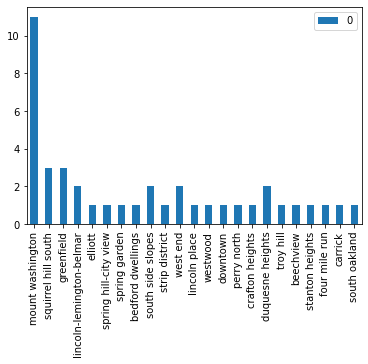

In [17]:
df = pd.DataFrame.from_dict(nbddict, orient="index")
df.plot.bar()

By looking at the resulting bar graph, we can see that Mount Washington stands out miles ahead the rest, with over triple the amount of landslide fatalities and injuries than any other neighborhood. A majority of them have a single recorded incident, while a handful have 2 or 3. Anything not in the resulting dataframe had no recoded landslides, and are thus equally safe.

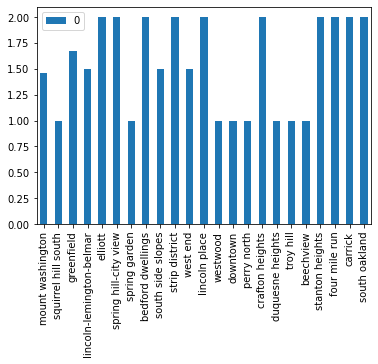

In [18]:
df2 = pd.DataFrame.from_dict(lssize, orient="index")
df2.plot.bar()

Finally, this last graph shows the average intensity of all landslides that occurred, valuing a small one at 1, medium at 2, and large at 3. By totaling the values of each landslide for a given neighborhood, and then finding the mean, we get the average strength of a landslide in any given area, though due to the small dataset for most neighborhoods, they might not be a valid representation.

### Conclusion

In conclusion, there are a good few neighborhoods in Pittsburgh that have no landslides on record, but some such as Greenfield, Squirrel Hill South, and especially Mount Washington have a relatively high frequency, with many other neighborhoods having high intensity ones rarely. Though, for me personally, my favorite neighborhood is Squirrel Hill North and South, so to see it be a standout dangerous neighborhood according to this metric is disappointing to say the least.